In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [3]:
#Loading dataset to out notebook.
data = pd.read_csv("train.csv")

In [4]:
# first step is to understad data #columns # number of rows # data shape 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#finding the number of rows and columns
data.shape

(891, 12)

In [6]:
#finding just nummerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#gettin a summery of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#finding the number of unique values for eahc column
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
#Finding and removing Missing Data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

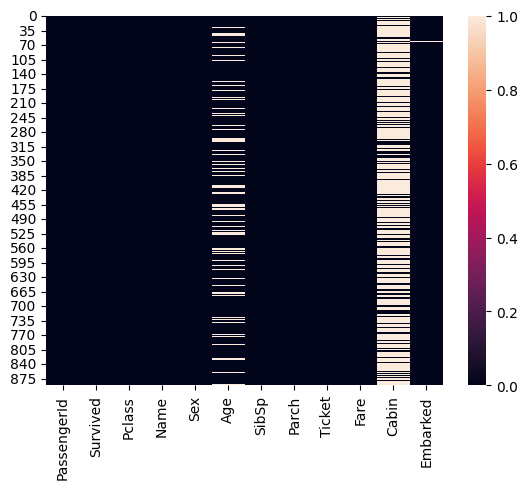

In [10]:
#for seeing in a better way we can use seaborn library function to vizualize it.
sns.heatmap(data.isnull())

In [11]:
# As it is clear there are just three columns with null values
#Therefor I want ot remove the Cobin column, repalce Age columns null values with the median value, and drop null values form embarked
#replcing Age values with median
m_age = data["Age"].median()
data["Age"] = data["Age"].fillna(m_age)
data = data.dropna(subset=['Embarked'])
#removing Cabin column since it have too many null values
new_data = data.drop(["Cabin"], axis=1)

<Axes: >

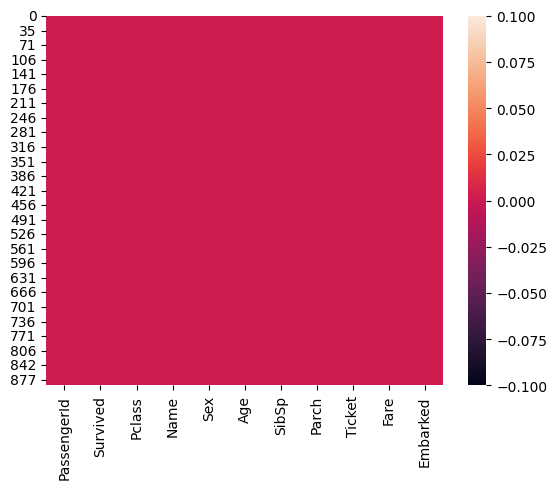

In [12]:
#Cheking if all null values handeled
sns.heatmap(new_data.isnull())

<Axes: xlabel='Age'>

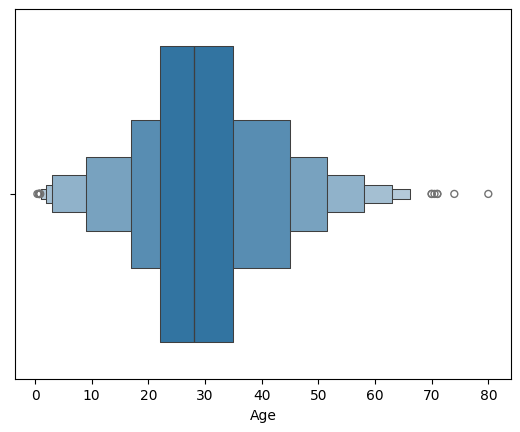

In [13]:
#Univariate Analysis
sns.boxenplot(x = new_data["Age"])

<Axes: xlabel='Survived', ylabel='Count'>

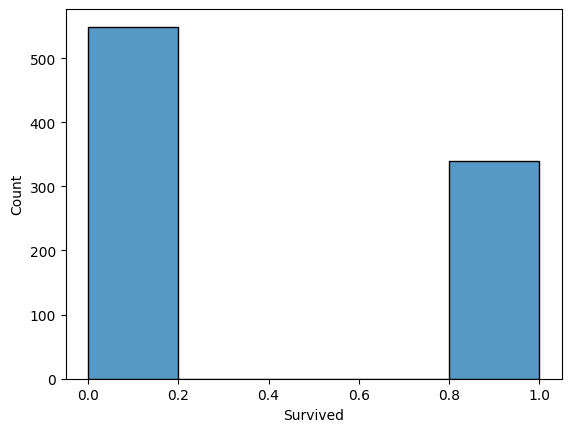

In [14]:
sns.histplot(new_data["Survived"], bins = 5)

In [15]:
# removing unnecessary columns
new_data = new_data.drop(["SibSp","Parch","Ticket","Fare"], axis = 1)

In [16]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S


In [17]:
# Chekcing correlation between variables
# since I have non nummerical columns i need ro convert them to numerical representaion 
new_data_encoded = pd.get_dummies(new_data)

In [18]:
#for handlinge infinit values we can filtter them 
new_data_filtered = new_data_encoded[np.isfinite(new_data_encoded).all(axis=1)]
relationship = new_data_filtered.corr()

In [ ]:
#now I can visualize the correlation
sns.heatmap(relationship, xticklabels = relationship.columns, yticklabels = relationship.columns, annot=True)

In [ ]:
# visualyzing the correlation between each two variables
sns.pairplot(new_data_filtered)

In [ ]:
print(new_data_filtered.columns)

In [ ]:
#Bivariate Analysis
#visualizing the relationship of  passengers' survival status with their age, colored by whether they are female or male 
sns.relplot(x="Survived", y="Age", hue="Sex_female", data=new_data_filtered)
plt.show()

In [ ]:
sns.scatterplot(x = "Age", y= "Embarked_Q", data=new_data_filtered )